# 로맨스가 필요해! -신데렐라-

 ## Ready!
 ## 학습 데이터 준비하고 전처리 하기

### 데이터 준비하기

In [1]:
# 꼬꼬무 나라 여성 데이터 준비
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/꼬꼬무_인공지능/2.3_신데렐라/bodysize_wholecountry.csv')

df.head(10)

Mounted at /content/drive


,height,weight,foot_size
0,163,51,245
1,155,47,240
2,169,60,245
3,183,68,255
4,182,66,255
5,141,43,235
6,162,52,245
7,174,59,250
8,154,47,240
9,159,49,240


In [2]:
# 키, 몸무게 추출하여 넘파이 배열로 저장

body_full = df[['height', 'weight']].to_numpy()
print(body_full)

[[163  51]
 [155  47]
 [169  60]
 [183  68]
 [182  66]
 [141  43]
 [162  52]
 [174  59]
 [154  47]
 [159  49]
 [166  58]
 [173  64]
 [161  55]
 [179  64]
 [140  43]
 [182  67]
 [175  65]
 [165  57]
 [176  65]
 [184  73]
 [164  56]
 [178  63]
 [140  39]
 [160  56]
 [177  67]
 [152  47]
 [157  53]
 [173  62]
 [151  49]
 [176  62]
 [182  64]
 [159  52]
 [158  52]
 [161  54]
 [146  45]
 [185  70]
 [166  54]
 [157  51]
 [182  68]
 [184  67]
 [156  50]
 [159  50]
 [170  59]
 [183  68]
 [141  41]
 [174  66]
 [167  56]
 [175  65]
 [147  45]
 [151  44]
 [161  54]
 [143  43]
 [170  58]
 [156  50]
 [177  67]
 [167  55]
 [167  54]
 [162  54]
 [141  43]
 [163  53]
 [145  44]
 [185  73]
 [171  62]
 [168  59]
 [161  56]
 [174  66]
 [145  43]
 [145  45]
 [184  74]
 [179  62]
 [167  53]
 [177  67]
 [159  51]
 [155  50]
 [150  48]
 [144  43]
 [185  74]
 [141  38]
 [143  44]
 [154  51]
 [181  72]
 [180  71]
 [145  46]
 [175  64]
 [183  67]
 [182  69]
 [142  42]
 [169  61]
 [183  73]
 [174  58]
 [158  51]

In [3]:
# 신발 사이즈를 추출하여 넘파이 배열로 저장
body_foot = df['foot_size'].to_numpy()
print(body_foot)

[245 240 245 255 255 235 245 250 240 240 245 250 245 250 235 255 250 245
 250 255 245 250 235 245 250 240 240 250 240 250 255 240 240 245 235 255
 245 240 255 255 240 240 250 255 235 250 245 250 235 240 245 235 250 240
 250 245 245 245 235 245 235 255 250 245 245 250 235 235 255 250 245 250
 240 240 240 235 255 235 235 240 255 255 235 250 255 255 235 245 255 250
 240 235 240 240 250 255 250 250 235 250]


### 데이터 시각화하기

In [4]:
# 데이터 시각화를 위한 matplotlib 라이브러리 사용
import matplotlib.pyplot as plt

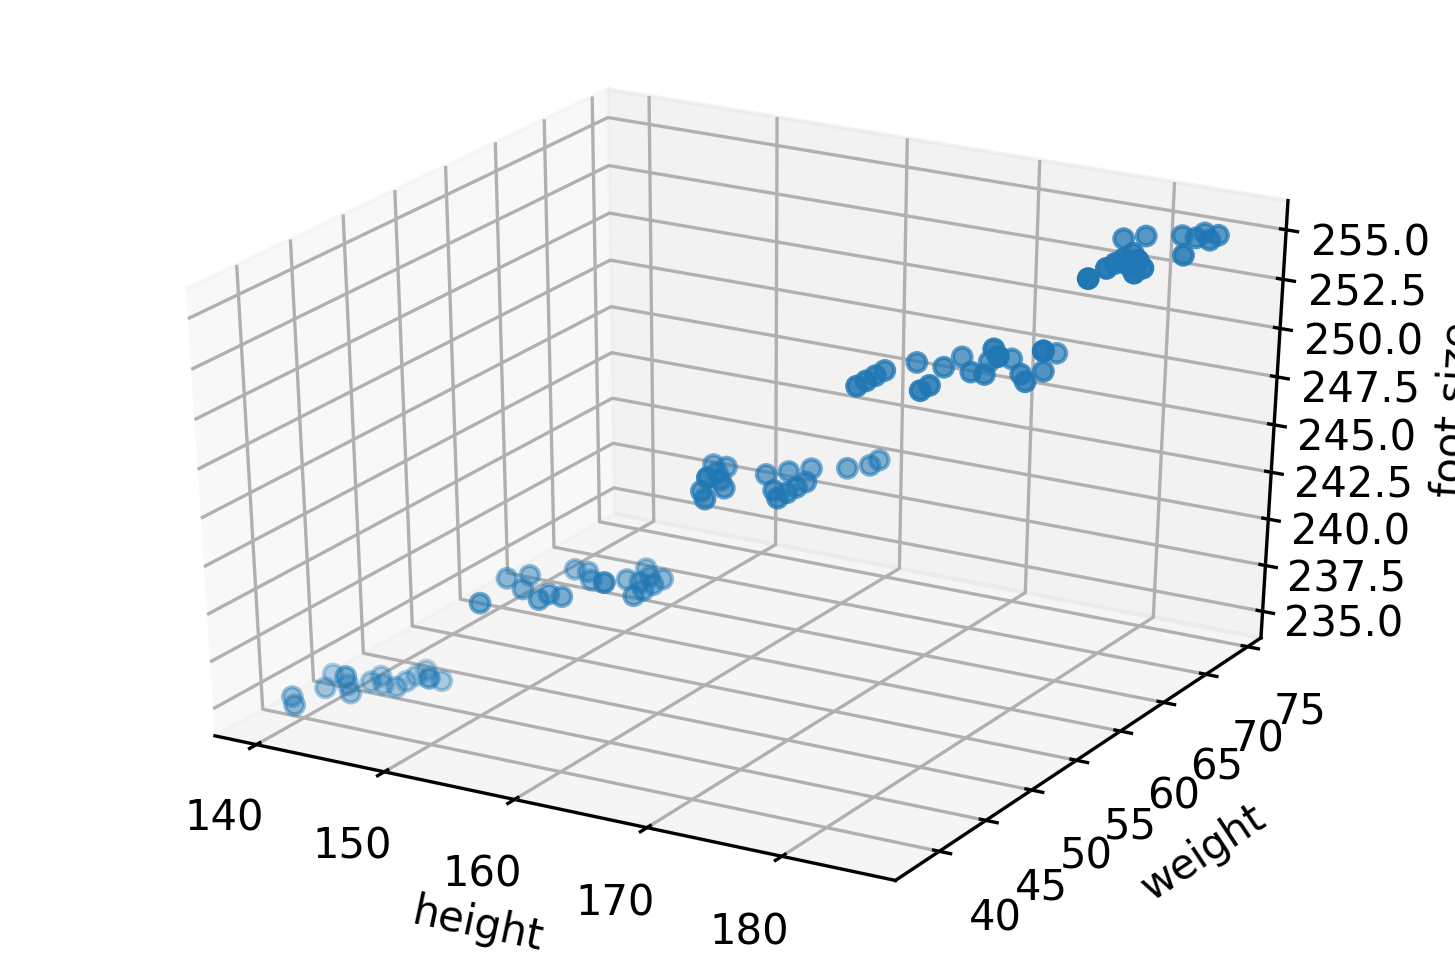

In [5]:
fig = plt.figure(dpi = 300)
ax = fig.gca(projection = '3d') # 3차원으로 그래프를 그리기 위해서 projection = '3d'로 지정

ax.scatter(df['height'], df['weight'],df['foot_size'])
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('foot size')

plt.savefig('그래프.png')
plt.show()

###데이터 전처리하기

In [6]:
# 데이터를 3:1 비율로 훈련 세트와 테스트 세트로 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target =train_test_split(body_full, body_foot, random_state=42)

## Make! 
## 꼬꼬무 국민 데이터로 인공지능 모델 만들기

In [7]:
# 훈련 세트와, 테스트 세트의 각각의 샘플 개수와 속성의 수 확인
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(75, 2) (25, 2)
(75,) (25,)


### 선형 회귀 모델 훈련하기1 - 2개의 특성으로 모델 훈련

In [8]:
# lr 객체 생성
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target) # 선형 회귀 모델 훈련

LinearRegression()

In [9]:
# 훈련 점수, 테스트 점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.965210360145723
0.9582324984510556


### 선형 회귀 모델 훈련하기2 - 특성 공학을 사용하여 모델 훈련

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False) # degree = 3으로 하여 특성의 최대 차수 결정, 이 경우는 최대 차수가 3제곱이 됨
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

poly.get_feature_names() # 만들어진 특성 확인

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)

LinearRegression()

In [12]:
# 새로 만든 선형 회귀 모델의 훈련 점수, 테스트 점수 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9685429636192898
0.9653921619084841


## Predict! 
## 꼬꼬 마을 주민 중 신발 사이즈 245mm에 가까운 사람 찾기

###새로운 데이터 준비하기

In [13]:
# 꼬꼬 마을 여성의 데이터 준비
df = pd.read_csv('/content/drive/My Drive/꼬꼬무_인공지능/2.3_신데렐라/bodysize_village.csv')
df

,height,weight,name
0,172,60,emma
1,149,45,violet
2,146,43,kennedy
3,170,60,victoria
4,170,55,ella
5,175,67,savannah
6,156,51,penelope
7,144,42,ellie
8,153,50,evan
9,168,52,jy


In [14]:
# 키, 몸무게를 추출하여 넘파이 배열로 저장
body_full = df[['height', 'weight']].to_numpy()
names = df['name']

### 특성 공학을 적용한 선형 회귀 모델로 신발 사이즈 예측

In [15]:
lr_prediction = []
for i in range(10):
  x0 = body_full[i][0]
  x1 = body_full[i][1]
  lr_prediction.append(lr.predict([[x0, x1, x0 * x0, x0 * x1, x1 * x1, x0 * x0 * x0, x0 * x0 * x1, x0 * x1 * x1, x1 * x1 * x1]])) # predict 메소드를 사용할 때는 새로 만든 특성의 순서대로 입력해야 함

In [16]:
# 자료형 확인
print(type(names))
print(type(lr_prediction))


<class 'pandas.core.series.Series'>
<class 'list'>


In [17]:
# 데이터프레임으로 자료형 변경
names_data = pd.DataFrame(names)
lr_predict_data = pd.DataFrame(lr_prediction)


In [18]:
print(names_data)

       name
0      emma
1    violet
2   kennedy
3  victoria
4      ella
5  savannah
6  penelope
7     ellie
8      evan
9        jy


In [19]:
print(lr_predict_data)

            0
0  248.666939
1  237.279867
2  235.915016
3  247.515955
4  246.532283
5  251.194489
6  240.597421
7  234.948615
8  239.467080
9  243.273692


In [20]:
lr_new = names_data.join(lr_predict_data)

print(lr_new)

       name           0
0      emma  248.666939
1    violet  237.279867
2   kennedy  235.915016
3  victoria  247.515955
4      ella  246.532283
5  savannah  251.194489
6  penelope  240.597421
7     ellie  234.948615
8      evan  239.467080
9        jy  243.273692


In [21]:
lr_new = lr_new.rename(columns = {0:'foot_size'}) # '0'열의 이름을 'foot_size'로 수정
print(lr_new)

       name   foot_size
0      emma  248.666939
1    violet  237.279867
2   kennedy  235.915016
3  victoria  247.515955
4      ella  246.532283
5  savannah  251.194489
6  penelope  240.597421
7     ellie  234.948615
8      evan  239.467080
9        jy  243.273692


In [22]:
min = 100
minIndex= 0

for i in range(10):
  if abs(245 - lr_new['foot_size'][i]) < min:
    min = abs(245 - lr_new['foot_size'][i]) # 245와 가장 근접한 발 크기를 가진 사람 찾기
    minIndex = i

print(lr_new['name'][minIndex])

ella
